Определять правильно типы признаков в данных очень важно, так как не все методы мы можем применять к любым типам признаков. Кроме того, не все признаки можно сразу использовать - некоторые требуют дополнительной предобработки. Поэтому прежде, чем приступить к решению задачи, необходимо посмотреть на датасет и понять, с какими признаками вы имеете дело.

Один из крупных российских банков предоставил данные о московских квартирах, выставленных на продажу

Давайте для начала откроем наш файл и посмотрим на данные, которые нам предложены:

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

In [110]:
data = pd.read_csv('data/data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


Для того, чтобы посмотреть на типы данных, запросим информацию о датасете:

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

Обратите внимание на типы признаков. Категориальные и ординальные чаще всего закодированы как признаки типа "object" (но помните, что иногда категориальные и ординальные могут быть закодированы и числами, поэтому в будущем всегда внимательно смотрите на полученные данные!)

In [112]:
#Введите название переменной, которой обозначен категориальный признак
display(data.sub_area.values)

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", ...,
       'Poselenie Vnukovskoe', 'Obruchevskoe', 'Novogireevo'],
      dtype=object)

In [113]:
#Введите название переменной, которой обозначен ординальный признак
display(data.ecology.values)

array(['good', 'excellent', 'poor', ..., 'no data', 'satisfactory',
       'poor'], dtype=object)

## Работа с пропусками
Загрузите данные train.csv, найдите признак, обозначающий штат. Затем найдите значение, которое встречается чаще всего. Замените пропуски этим значением и запишите получившийся признак в переменную result.

In [114]:
vis_data = pd.read_csv("./data/train.csv", encoding = 'ISO-8859-1', low_memory = False)
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [115]:
# result = vis_data.state.mode
# vis_data.state.fillna(result)
vis_data.state.value_counts().index[0]

'MI'

Продолжим готовить к анализу наш Data set, посвященный квартирам, выставленным на продажу. Избавимся от пропусков. Просто удалять данные с пропусками довольно грубо. Однако если у вас большое количество объектов, и лишь крайне малая их доля имеет пропущенные значения, то это возможное допущение. Поступим здесь таким образом. Нас будут интересовать только те квартиры, про которые продавцы заполнили все данные. Удалите, пожалуйста, все строки, где есть хотя бы один пропуск. Сколько объектов осталось?

In [116]:
data.dropna()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452
6,7,25,14.0,10.0,Sokol'niki,933.0,5,5050.0,5,0,...,0.513689,0.067725,0.273019,0.516979,0.822377,0.318230,0.752223,2.969315,poor,5500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30461,30466,56,29.0,13.0,Severnoe Tushino,4116.0,5,9891.0,5,0,...,0.232778,1.491458,0.648281,0.193474,0.283044,2.040548,23.720332,12.198090,satisfactory,12000000
30462,30467,56,51.0,19.0,Sviblovo,2057.0,1,3741.0,2,0,...,0.187828,0.969990,0.510751,0.566309,1.261711,0.532268,3.672399,2.988268,poor,10262010
30465,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.540003,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,25000000
30467,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.108672,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,13500000


Загрузите данные train.csv, найдите признак, обозначающий баланс. Нормализуйте признак с помощью std-нормализации. Проверьте, что вы нашли нужный признак и нормализовали его подходящим методом. Метод для нормализации принимает матрицу, а не массив. В numpy можно превратить массив в матрицу с помощью reshape(). В качестве ответа укажите минимальное значение в получившемся нормализованном признаке. Ответ округлите до 5 знаков после запятой.

In [117]:
vis_data = pd.read_csv("./data/train.csv", encoding = 'ISO-8859-1', low_memory = False)
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [118]:
vis_data.balance_due.head()

0    305.0
1     75.0
2      0.0
3      0.0
4      0.0
Name: balance_due, dtype: float64

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(vis_data.balance_due.values.reshape((-1,1)))
print(scaled.min())

-13.147334652567258


Загрузите данные train.csv, найдите признак, обозначающий баланс. Для приведения данных к более нормальному виду часто используют различные преобразования, например, взятие корня от признака.
Возьмите корень у положительных значений, найдите медианное и среднее значение. В качестве ответа укажите модуль разницы этих значений.

In [120]:
vis_data = pd.read_csv("./data/train.csv", encoding = 'ISO-8859-1', low_memory = False)
print(vis_data.balance_due.head())
normalized = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0])
print(normalized.head())
normalized.median() - normalized.mean()


0    305.0
1     75.0
2      0.0
3      0.0
4      0.0
Name: balance_due, dtype: float64
0    17.464249
1     8.660254
5    17.464249
6    29.240383
7    11.832160
Name: balance_due, dtype: float64


0.4525960609393067

Вернемся к первичному анализу наших данных по квартирам, выставленным на продажу. Предположим, что вы хотите проанализировать состояние цен на квартиры в нескольких  районах : "Лефортово", "Перово", "Басманное" и "Богородское". Для того, чтобы сравнить цены на квартирах в этих районах, можно использовать визуализацию с помощью боксплотов. Постройте боксплоты для распределения цен по этим районами (должно получиться четыре боксплота - по одному для каждого района). На основании полученных диаграмм ответьте на вопросы ниже.

id  full_sq  life_sq  floor     sub_area  preschool_quota  \
4    5       77     77.0    4.0    Basmannoe           3240.0   
14  15       31     21.0    3.0    Lefortovo           1768.0   
28  29       73     38.0   15.0  Bogorodskoe           3107.0   
56  57       56     39.0    4.0  Bogorodskoe           3107.0   
83  84       66     42.0    7.0    Basmannoe           3240.0   

    preschool_education_centers_raion  school_quota  \
4                                   7        7770.0   
14                                  4        4564.0   
28                                  7        7277.0   
56                                  7        7277.0   
83                                  7        7770.0   

    school_education_centers_raion  school_education_centers_top_20_raion  \
4                                9                                      0   
14                               4                                      0   
28                               9                 

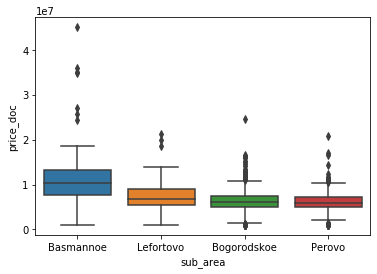

In [121]:

filtered = data[data.sub_area.isin(['Basmannoe', 'Lefortovo', 'Perovo', 'Bogorodskoe'])]
print(filtered.head())

sns.boxplot(x='sub_area', y='price_doc', data=filtered)


## Создание новых признаков

Загрузите данные train.csv, найдите признак, обозначающий баланс и признак, обозначающий размер скидки. Создайте полиномиальные признаки степени 3. Посчитайте среднее значение для каждого получившегося признака. В качестве ответа укажите номер признака, который содержит максимальное среднее значение.


In [122]:
vis_data = pd.read_csv("./data/train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [123]:
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'discount_amount']])
poly_df = pd.DataFrame(poly_features)
print(poly_df)
# poly_df.mean()

0      1    2        3    4    5           6    7    8    9
0       1.0  305.0  0.0  93025.0  0.0  0.0  28372625.0  0.0  0.0  0.0
1       1.0   75.0  0.0   5625.0  0.0  0.0    421875.0  0.0  0.0  0.0
2       1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
3       1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
4       1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
...     ...    ...  ...      ...  ...  ...         ...  ...  ...  ...
250301  1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
250302  1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
250303  1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
250304  1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
250305  1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0

[250306 rows x 10 columns]


Загрузите данные train.csv, найдите признак, обозначающий дату, когда был выписан штраф. Найдите, сколько раз штраф был выписан на выходных и запишите это число в качестве ответа.

In [124]:
vis_data.info()
issued_dates = pd.to_datetime(vis_data.ticket_issued_date.dropna())
issued_dates.loc[issued_dates.dt.weekday > 4]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

5        2004-05-01 11:50:00
24       2004-11-13 15:30:00
25       2004-11-13 15:30:00
26       2005-01-01 11:00:00
2078     2005-02-05 13:25:00
                 ...        
250260   2011-12-24 11:30:00
250261   2011-12-24 11:30:00
250262   2011-12-24 11:30:00
250263   2011-12-24 11:30:00
250295   2011-12-31 16:15:00
Name: ticket_issued_date, Length: 1620, dtype: datetime64[ns]

Ранее мы уже выяснили, что данные о квартирах не все числовые. Есть и признаки, которые содержат текстовые значения : ординальный (уровень экологии) и категориальный (район). Нам обязательно нужно перекодировать эти признаки, так как иначе мы не сможем в дальнейшем работать с этим датасетом и применять на нем какие-то математические алгоритмы. 

Ординальный признак мы можем перекодировать в числовой довольно простым способом: просто заменить каждое значение на число (4 - 'excellent', 3 - 'good' etc.).

Для этого необходимо:

* создать словарь, , сопоставляющий числовые значения от 0 до 4 описанию экологии от 'no data' до 'excellent' соответственно
* заменить значения в колонке ecology на заданные нами выше с помощью метода .replace:

`data.ecology = data.ecology.replace(to_replace=ecology_dict)`


In [128]:
print(data.ecology.value_counts())
ecology_dict = { 'no data': 0, 'poor': 1, 'satisfactory': 2, 'good': 3, 'excellent': 4 }
display(data.head())

# data.ecology = data.ecology.replace(to_replace=ecology_dict)
display(data.head())
data.ecology.mean()


1    8017
0    7656
3    7173
4    3938
2    3685
Name: ecology, dtype: int64


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,3,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,4,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,1,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,3,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,4,16331452


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,3,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,4,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,1,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,3,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,4,16331452


1.7282483836030063

Теперь необходимо разобраться с переменной, содержащей информацию о районе.  Для этого воспользуйтесь методом get_dummies

In [88]:
print(data.sub_area.value_counts())

area_dummies = pd.get_dummies(data.sub_area)
display(area_dummies.head())
data.join(area_dummies)


Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Kievskij                   2
Poselenie Shhapovskoe                2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64


,Ajeroport,Akademicheskoe,Alekseevskoe,Altuf'evskoe,Arbat,Babushkinskoe,Basmannoe,Begovoe,Beskudnikovskoe,Bibirevo,...,Vnukovo,Vojkovskoe,Vostochnoe,Vostochnoe Degunino,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,Vnukovo,Vojkovskoe,Vostochnoe,Vostochnoe Degunino,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0,0,0,0,0,0,0,0,0,0
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,0,0,0,0,0,0,0,0,0,0
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0,0,0,0,0,0,0,0,0,0
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30464,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,0,0,0,0,0,0,0,0,0,0
30465,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0,0,0,0,0,0,0,0,0,0
30466,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
30467,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,0,0,0,0,0,0,0,0,0,0


## Нахождение выбросов

Загрузите данные train.csv, найдите признак, обозначающий баланс. Уберите пропуски из этого признака и найдите выбросы с помощью межквартильного расстояния. Найдите модуль разницы между минимальным и максимальным выбросом.

In [144]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]    

vis_data = pd.read_csv("./data/train.csv", encoding = 'ISO-8859-1', low_memory = False)

o = outliers_iqr(vis_data.balance_due.dropna())
balance = vis_data.iloc[o].balance_due
np.max(balance) - np.min(balance)


# outliers = outliers_iqr(vis_data.balance_due.dropna())
# np.max(outliers) - np.min(outliers)

6          855.0
9          855.0
12         855.0
13         855.0
14         855.0
           ...  
250257    1130.0
250258    1130.0
250259    1130.0
250274    1130.0
250287    1130.0
Name: balance_due, Length: 9833, dtype: float64